## Data Beginning Exploration & Cleaning my Columns
#### About the data
* Pulled from Kaggle.com
* Dataset name on Kaggle: Indeed Dataset (Data Scientist, Analyst, and Engineer)
* Age of dataset: 11/02/2018
* The data was originally sourced from Indeed.
* 43 Columns
* 5715 Rows

In [ ]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read Indeed Dataset and store into Pandas data frame
indeed_df = pd.read_csv("./indeed_job_dataset.csv")
indeed_df

In [ ]:
# What are the column names
indeed_df.columns

#### Removing the following columns
* Link column
* Date since posted
* Description

In [ ]:
# Dropping unusable columns
indeed_df = indeed_df.drop(columns = ["Unnamed: 0", "Link", "Date_Since_Posted", "Description"])

In [ ]:
# Checking DataFrame
indeed_df.columns

### My Columns for Cleaning
    Originally we seperated the columns evenly (or as evenly as possible), but some columns didn't need cleaning. I started with columns: 'IL', 'WA', 'MD', 'DC', 'NC', 'Other_states', 'Consulting and Business Services', 'Internet and Software', 'Banks and Financial Services', 'Health Care', 'Insurance', and 'Other_industries'. However, all of those columns were already cleaned. Thus, I took columns 'No_of_Reviews' and 'Company_Industry' from Jennifer and Lori. 

    We decided it would be best if we each created a dataframe with our columns only. This is what I did before beginning the cleaninging process.

In [ ]:
# Seperating my rows to clean
suzy_col = indeed_df.loc[:, ['No_of_Reviews','Company_Industry', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries']]

In [ ]:
# Checking DataFrame
suzy_col

In [ ]:
# What are the data types
suzy_col.dtypes

In [ ]:
# Filling company industry NaNs with Not Listed
# Chose to fill with string because the column was already filled with strings
suzy_col['Company_Industry'] = suzy_col['Company_Industry'].fillna('Not Listed')

In [ ]:
# Filling No_of_Reviews NaNs with 0
# Chose to fill with 0 because the column contains floats
suzy_col['No_of_Reviews'] = suzy_col['No_of_Reviews'].fillna(0)

In [ ]:
suzy_col.to_csv('./SuzyColumns.csv')

### Exploring my set of columns


In [ ]:
# Exploring usable data - 'No_of_Reviews'
suzy_col.loc[suzy_col['No_of_Reviews']!= 0, :]['No_of_Reviews'].count()

In [ ]:
# Exploring usable data - 'Company_Industry'
suzy_col.loc[suzy_col['Company_Industry']!= 'Not Listed', :]['Company_Industry'].count()

In [ ]:
# Exploring usable data - 'IL'
suzy_col['IL'].sum()

In [ ]:
# Exploring usable data - 'WA'
suzy_col['WA'].sum()

In [ ]:
# Exploring usable data 
suzy_col['MD'].sum()

In [ ]:
# Exploring usable data 
suzy_col['DC'].sum()

In [ ]:
# Exploring usable data 
suzy_col['NC'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Other_states'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Consulting and Business Services'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Internet and Software'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Banks and Financial Services'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Health Care'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Insurance'].sum()

In [ ]:
# Exploring usable data 
suzy_col['Other_industries'].sum()

In [ ]:
# Test
suzy_col.loc[suzy_col['No_of_Reviews']!= 0, 'No_of_Reviews']

In [ ]:
# Looking for outliars to determine if I should filter
reviews = suzy_col.loc[suzy_col['No_of_Reviews']!= 0, 'No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews')
ax1.set_ylabel('Reviews')
fig1.set_size_inches(4, 10)
ax1.boxplot(reviews)

# Saving figure
# plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()

# Data Exploration & Analysis on Clean Data
Further Exploring and cleaning "clean", merged dataset.

In [24]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Read Clean Indeed Dataset and store into Pandas data frame
clean_indeed_df = pd.read_csv("./Indeed Data Set.csv")
clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.299999952,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0.0,Missing,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.300000191,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.099999905,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,0.0,Missing,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.700000048,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.900000095,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


In [26]:
# Exploring Number of stars after filtering
test = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 100)]
test['No_of_Stars'].value_counts()

3.900000095    551
4.0            518
3.799999952    458
4.199999809    328
3.700000048    289
4.099999905    208
3.599999905    206
4.300000191    127
3.5            108
3.299999952     92
3.400000095     71
3.200000048     34
4.400000095     16
2.799999952     14
3.0              7
3.099999905      5
2.900000095      4
4.5              4
4.800000191      1
Name: No_of_Stars, dtype: int64

In [27]:
# Checking columns
clean_indeed_df.columns

Index(['Job_Title', 'Queried_Salary', 'Job_Type', 'Skill', 'No_of_Skills',
       'Company', 'No_of_Reviews', 'No_of_Stars', 'Location',
       'Company_Revenue', 'Company_Employees', 'Company_Industry', 'python',
       'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC',
       'NC', 'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [28]:
# Filtering data to keep those above 500 reviews
# Was going to use this, but decided not to.
indeed_df_500 = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 500)]
indeed_df_500

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.299999952,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
9,Data Scientist,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.300000191,MO,Missing,...,0,0,0,1,0,0,0,0,0,1
10,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.199999809,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
11,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4.199999809,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
17,Data Scientist,<80000,data_scientist,"['Microsoft SQL Server', 'Data Mining', 'Machi...",12,Deloitte,7197.0,4.0,VA,Missing,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,"Sr. Director, Data Engineering",>160000,data_engineer,"['SOX', 'Machine Learning', 'PCI', 'Leadership...",6,Capital One,6791.0,4.0,VA,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0
5704,"Senior Data Engineer (Java, Hadoop)",>160000,data_engineer,"['Linux', 'Hive', 'Data Management', 'Hadoop',...",14,JPMorgan Chase,21159.0,3.900000095,NJ,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.900000095,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


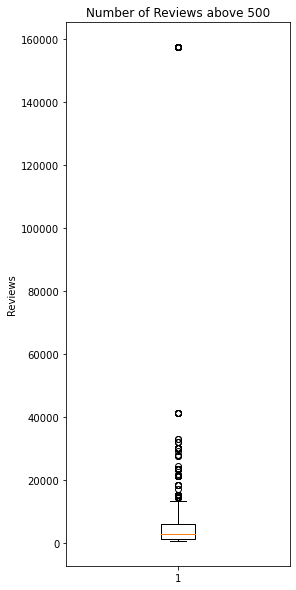

In [29]:
reviews = indeed_df_500['No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews above 500')
ax1.set_ylabel('Reviews')
fig1.set_size_inches(4, 10)
ax1.boxplot(reviews)

# Saving figure
plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()

In [30]:
# What is the distributions of rating
print(indeed_df_500['No_of_Stars'].value_counts())
print(clean_indeed_df['No_of_Stars'].value_counts())

# After this decided to use clean_indeed_df instead of indeed_df_500

4.0            459
3.900000095    450
3.799999952    351
4.199999809    194
3.700000048    177
4.099999905    159
3.599999905    143
3.299999952     71
4.300000191     68
3.5             61
3.400000095     32
3.200000048     17
2.799999952      7
4.400000095      7
3.0              3
2.900000095      1
4.800000191      1
Name: No_of_Stars, dtype: int64
Missing        962
4.0            696
3.900000095    653
3.799999952    584
3.700000048    431
4.199999809    395
4.099999905    340
3.599999905    336
3.5            199
4.300000191    197
3.299999952    163
3.400000095    147
4.800000191    116
4.5             73
3.200000048     72
3.0             70
3.099999905     42
4.400000095     39
2.799999952     32
5.0             30
2.900000095     28
2.5             23
2.599999905     20
4.599999905     19
2.700000048     13
4.699999809     11
2.0              5
2.299999952      5
2.400000095      3
4.900000095      3
1.700000048      2
1.899999976      2
1.799999952      2
1.299999952      1

In [31]:
# Realized there are multiple rows for the same column
clean_indeed_df['Company'].value_counts()

Booz Allen Hamilton                        151
Harnham                                     87
Capgemini                                   84
Facebook                                    65
KPMG LLP                                    64
                                          ... 
Cable & Wireless Communications Inc          1
Par Government Systems Corporation           1
Northeastern University                      1
T1D Exchange                                 1
Universities Space Research Association      1
Name: Company, Length: 2231, dtype: int64

In [32]:
# New Data Frame to just keep pertinent information for my analysis
new_df_undup = clean_indeed_df.loc[:, ['Queried_Salary', 'Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location', 'Company_Revenue', 
                                 'Company_Employees', 'Company_Industry']]
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3.299999952,MO,More than $10B (USD),"10,000+",Health Care
1,<80000,data_scientist,Money Mart Financial Services,0.0,Missing,TX,Missing,missing,Not Listed
2,<80000,data_scientist,comScore,62.0,3.5,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.300000191,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.099999905,TX,Missing,"Less than 10,000",Banks and Financial Services
...,...,...,...,...,...,...,...,...,...
5710,>160000,data_engineer,Intelliswift Software Inc,0.0,Missing,Missing,Missing,missing,Not Listed
5711,>160000,data_engineer,Jobspring Partners,31.0,3.700000048,CA,Missing,missing,Human Resources and Staffing
5712,>160000,data_engineer,JPMorgan Chase,21159.0,3.900000095,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [33]:
# Removing those records that are missing No_of_Stars
new_df_undup = new_df_undup.loc[new_df_undup['No_of_Stars'] != "Missing", :]
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3.299999952,MO,More than $10B (USD),"10,000+",Health Care
2,<80000,data_scientist,comScore,62.0,3.5,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.300000191,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.099999905,TX,Missing,"Less than 10,000",Banks and Financial Services
5,<80000,data_scientist,National Security Agency,173.0,4.300000191,MD,Missing,missing,Not Listed
...,...,...,...,...,...,...,...,...,...
5708,>160000,data_engineer,Workbridge Associates,40.0,3.400000095,CA,Missing,"Less than 10,000",Human Resources and Staffing
5711,>160000,data_engineer,Jobspring Partners,31.0,3.700000048,CA,Missing,missing,Human Resources and Staffing
5712,>160000,data_engineer,JPMorgan Chase,21159.0,3.900000095,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [34]:
# Removing duplicates across the columns
new_df_undup = new_df_undup.drop_duplicates()

In [35]:
# Checking data types
new_df_undup.dtypes

Queried_Salary        object
Job_Type              object
Company               object
No_of_Reviews        float64
No_of_Stars           object
Location              object
Company_Revenue       object
Company_Employees     object
Company_Industry      object
dtype: object

In [36]:
# converting No_of_Stars from object to int
# new_df_undup.astype({'No_of_Stars': 'int32'})
new_df_undup["No_of_Stars"] = new_df_undup["No_of_Stars"].astype('float')

<ipython-input-36-5b84488e634a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_undup["No_of_Stars"] = new_df_undup["No_of_Stars"].astype('float')


In [37]:
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3.3,MO,More than $10B (USD),"10,000+",Health Care
2,<80000,data_scientist,comScore,62.0,3.5,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.3,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.1,TX,Missing,"Less than 10,000",Banks and Financial Services
5,<80000,data_scientist,National Security Agency,173.0,4.3,MD,Missing,missing,Not Listed
...,...,...,...,...,...,...,...,...,...
5703,>160000,data_engineer,Coda Search,2.0,4.5,NY,Missing,missing,Human Resources and Staffing
5704,>160000,data_engineer,JPMorgan Chase,21159.0,3.9,NJ,More than $10B (USD),"10,000+",Banks and Financial Services
5712,>160000,data_engineer,JPMorgan Chase,21159.0,3.9,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [38]:
# Checking data types again
new_df_undup.dtypes

Queried_Salary        object
Job_Type              object
Company               object
No_of_Reviews        float64
No_of_Stars          float64
Location              object
Company_Revenue       object
Company_Employees     object
Company_Industry      object
dtype: object

## Company Ratings by Job Type

In [39]:
# New Data Frame for job type
new_df_job_type = new_df_undup.loc[:, ['Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars']]

# Removing duplicates
new_df_job_type = new_df_job_type.drop_duplicates()
new_df_job_type

,Job_Type,Company,No_of_Reviews,No_of_Stars
0,data_scientist,Express Scripts,3301.0,3.3
2,data_scientist,comScore,62.0,3.5
3,data_scientist,Central Intelligence Agency,158.0,4.3
4,data_scientist,Federal Reserve Bank of Dallas,495.0,4.1
5,data_scientist,National Security Agency,173.0,4.3
...,...,...,...,...
5660,data_engineer,The Boston Consulting Group,211.0,4.2
5669,data_engineer,Qualys,14.0,3.9
5677,data_engineer,Quantcast,14.0,3.1
5703,data_engineer,Coda Search,2.0,4.5


In [40]:
# Checking the number of records falling under each job type
new_df_job_type['Job_Type'].value_counts()

data_analyst      904
data_scientist    856
data_engineer     545
Name: Job_Type, dtype: int64

In [68]:
# Grouping by Job Type
groupby_job_type = new_df_job_type.groupby('Job_Type')

# Checking the number of reviews in each group
sum_reviews_by_job_type = groupby_job_type['No_of_Reviews'].sum()
print(sum_reviews_by_job_type)

# Creating division
print('--------------------------------')

# What is the average stars by job type
mean_star_by_job_type = groupby_job_type['No_of_Stars'].mean()
mean_star_by_job_type = mean_star_by_job_type.sort_values(ascending=True)
print(mean_star_by_job_type)

Job_Type
data_analyst      1281600.0
data_engineer      777426.0
data_scientist    1154455.0
Name: No_of_Reviews, dtype: float64
--------------------------------
Job_Type
data_analyst      3.747898
data_scientist    3.801869
data_engineer     3.818165
Name: No_of_Stars, dtype: float64


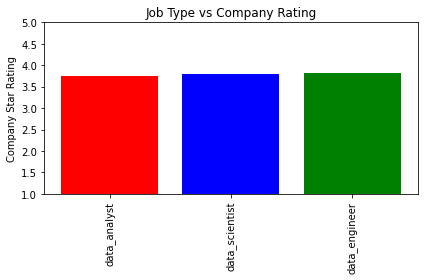

In [69]:
# Job Type Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
job_type = [value for value in mean_star_by_job_type]
x_axis_job = np.arange(len(mean_star_by_job_type))# Determine number of bars needed
tick_locations_job = [value for value in x_axis_job] # to tell the plot where to place tick marks

# Bar Chart
plt.bar(x_axis_job, job_type, color=['r', 'b', 'g'], alpha=1,  align="center")
plt.xticks(tick_locations_job, mean_star_by_job_type.index.values, rotation="vertical")
plt.ylim([1,5])
plt.title("Job Type vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()

# Saving figure
plt.savefig("./Job Type vs Company Ratings.png")

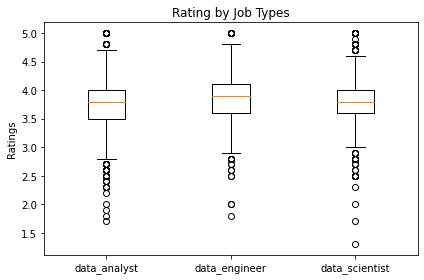

In [70]:
# Create a boxplot to compare means
job_types = ['data_analyst', 'data_engineer', 'data_scientist']
rates = []
data = []

#Setting up plot
fig1, ax1 = plt.subplots()
ax1.set_title('Rating by Job Types')
ax1.set_ylabel('Ratings')

for job in job_types:
    job_df = new_df_job_type.loc[new_df_job_type['Job_Type'] == job]
    rates.append(job_df['No_of_Stars'])
    rat = rates
    data.append(rat)
    rates = []
    
# Extracting from list fro boxplot
x1 = data[0]
x2 = data[1]
x3 = data[2]

# Convert to array source: https://www.educative.io/edpresso/how-to-convert-a-list-to-an-array-in-python
ax1.boxplot([np.array(x1[0]), np.array(x2[0]), np.array(x3[0])], labels = job_types)
plt.tight_layout()

# Saving figure
plt.savefig("./Job Type vs Company Ratings(2).png")

# Showing image
plt.show()

## Company Rating by Company Location

In [44]:
# New Data Frame for Company Location
new_df_location = new_df_undup.loc[:, ['Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location']]

# Removing duplicates
new_df_location = new_df_location.drop_duplicates()
new_df_location

,Company,No_of_Reviews,No_of_Stars,Location
0,Express Scripts,3301.0,3.3,MO
2,comScore,62.0,3.5,OR
3,Central Intelligence Agency,158.0,4.3,DC
4,Federal Reserve Bank of Dallas,495.0,4.1,TX
5,National Security Agency,173.0,4.3,MD
...,...,...,...,...
5658,BNY Mellon,3445.0,3.6,NY
5660,The Boston Consulting Group,211.0,4.2,NY
5679,Harnham,6.0,4.8,NJ
5703,Coda Search,2.0,4.5,NY


In [45]:
# Grouping by Location
groupby_location = new_df_location.groupby('Location')

# Checking the number of reviews in each group
sum_reviews_by_location = groupby_location['No_of_Reviews'].sum()
sum_reviews_by_location = sum_reviews_by_location.drop('Missing')
print(sum_reviews_by_location)


# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_location = groupby_location['No_of_Stars'].mean()
mean_star_by_location = mean_star_by_location.drop('Missing')
mean_star_by_location = mean_star_by_location.sort_values(ascending=True)
print(mean_star_by_location)


Location
AL          7515.0
AR        166321.0
AZ         96970.0
CA        793925.0
CO         88100.0
CT        101855.0
DC         96263.0
DE         52815.0
FL        151362.0
GA        247904.0
HI          1871.0
IA         45152.0
ID         11700.0
IL        251520.0
IN         32633.0
KS         18000.0
KY          9296.0
LA          2968.0
MA        208195.0
MD         75277.0
ME          2525.0
MI         69845.0
MN        110219.0
MO         34053.0
MT           106.0
NC        172848.0
ND            28.0
NE          3416.0
NH          3288.0
NJ        209197.0
NM          1787.0
NV         12330.0
NY        382240.0
OH        107438.0
OK           477.0
OR         59714.0
PA        123041.0
REMOTE      4247.0
RI          5597.0
SC         47071.0
TN         65893.0
TX        765047.0
USA       103118.0
UT         15192.0
VA        150068.0
WA        152405.0
WI         53152.0
WV           269.0
WY          4479.0
Name: No_of_Reviews, dtype: float64
------------------------

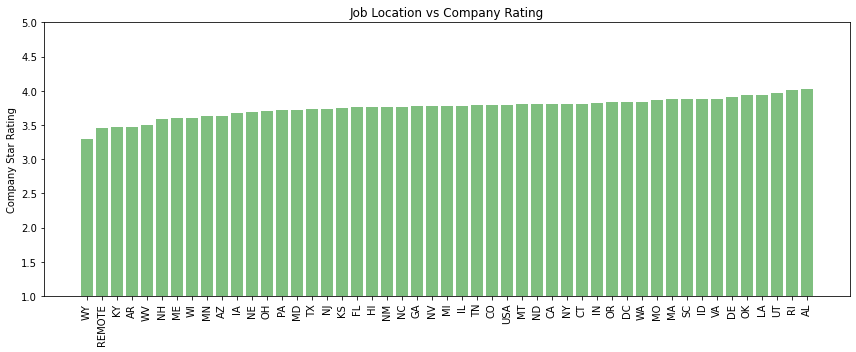

In [59]:
# Location Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
location = [value for value in mean_star_by_location]
x_axis_l = np.arange(len(mean_star_by_location))# Determine number of bars needed
tick_locations_l = [value for value in x_axis_l] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_l, location, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations_l, mean_star_by_location.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.title("Job Location vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Location vs Company Ratings.png")

## Company Rating by Job Salary

In [47]:
# New Data Frame for job salary
new_df_job_salary = new_df_undup.loc[:, ['Queried_Salary', 'Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location']]

# Removing duplicates
new_df_job_salary = new_df_job_salary.drop_duplicates()
new_df_job_salary

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location
0,<80000,data_scientist,Express Scripts,3301.0,3.3,MO
2,<80000,data_scientist,comScore,62.0,3.5,OR
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.3,DC
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.1,TX
5,<80000,data_scientist,National Security Agency,173.0,4.3,MD
...,...,...,...,...,...,...
5703,>160000,data_engineer,Coda Search,2.0,4.5,NY
5704,>160000,data_engineer,JPMorgan Chase,21159.0,3.9,NJ
5712,>160000,data_engineer,JPMorgan Chase,21159.0,3.9,DE
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY


In [48]:
# Grouping by Salary
groupby_salary = new_df_job_salary.groupby('Queried_Salary')

# Checking the number of reviews in each group
sum_reviews_by_salary = groupby_salary['No_of_Reviews'].sum()
sum_reviews_by_salary = sum_reviews_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
print(sum_reviews_by_salary)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_salary = groupby_salary['No_of_Stars'].mean()
mean_star_by_salary = mean_star_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
mean_star_by_salary = mean_star_by_salary.sort_values(ascending=True)
print(mean_star_by_salary)

Queried_Salary
<80000            542256.0
80000-99999      1804433.0
100000-119999    2635204.0
120000-139999    2424550.0
140000-159999    1523350.0
>160000           908022.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Queried_Salary
<80000           3.721363
80000-99999      3.803211
100000-119999    3.822967
120000-139999    3.851546
140000-159999    3.871721
>160000          3.900481
Name: No_of_Stars, dtype: float64


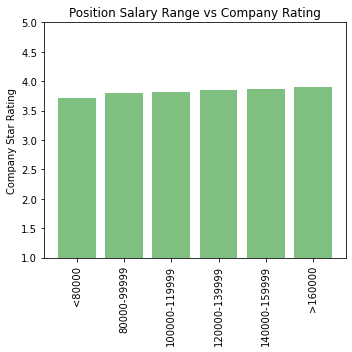

In [60]:
# Salary Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
salary = [value for value in mean_star_by_salary]
x_axis_sal = np.arange(len(mean_star_by_salary))# Determine number of bars needed
tick_loc_sal = [value for value in x_axis_sal] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_sal, salary, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_sal, mean_star_by_salary.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.title("Position Salary Range vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Position Salary Range vs Company Ratings.png")

## Company Rating by Company Industry, Revenue, and # of Employees

In [50]:
# New Data Frame for Company Industry, Revenue, and # of Employees
new_df_indrevemp = new_df_undup.loc[:, ['Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Company_Revenue', 
                                 'Company_Employees', 'Company_Industry']]

# Removing duplicates
new_df_indrevemp = new_df_indrevemp.drop_duplicates()
new_df_indrevemp

,Company,No_of_Reviews,No_of_Stars,Company_Revenue,Company_Employees,Company_Industry
0,Express Scripts,3301.0,3.3,More than $10B (USD),"10,000+",Health Care
2,comScore,62.0,3.5,Missing,missing,Not Listed
3,Central Intelligence Agency,158.0,4.3,Missing,missing,Government
4,Federal Reserve Bank of Dallas,495.0,4.1,Missing,"Less than 10,000",Banks and Financial Services
5,National Security Agency,173.0,4.3,Missing,missing,Not Listed
...,...,...,...,...,...,...
5627,Conductor,97.0,3.6,Missing,missing,Not Listed
5634,Cigna,3295.0,3.7,More than $10B (USD),"10,000+",Insurance
5650,BigCommerce,29.0,3.8,Less than $1B (USD),"Less than 10,000",Internet and Software
5656,Avvo,16.0,3.8,Missing,missing,Not Listed


In [51]:
# Grouping by Company Industry
groupby_industry = new_df_indrevemp.groupby('Company_Industry')

# Checking the number of reviews in each group
sum_reviews_by_industry = groupby_industry['No_of_Reviews'].sum()
sum_reviews_by_industry = sum_reviews_by_industry.drop("Not Listed")
print(sum_reviews_by_industry)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_industry = groupby_industry['No_of_Stars'].mean()
mean_star_by_industry = mean_star_by_industry.drop("Not Listed")
mean_star_by_industry = mean_star_by_industry.sort_values(ascending=True)
print(mean_star_by_industry)

Company_Industry
Aerospace and Defense                                               52474.0
Agriculture and Extraction                                           8215.0
Auto                                                                45733.0
Banks and Financial Services                                       230114.0
Computers and Electronics                                           57434.0
Construction                                                         4209.0
Consulting and Business Services                                   159637.0
Consumer Goods and Services                                         51014.0
Education and Schools                                               27464.0
Energy and Utilities                                                17395.0
Food and Beverages                                                  55690.0
Food and BeveragesConsulting and Business Services                  13098.0
Government                                                          122

<ipython-input-61-278bd7681174>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


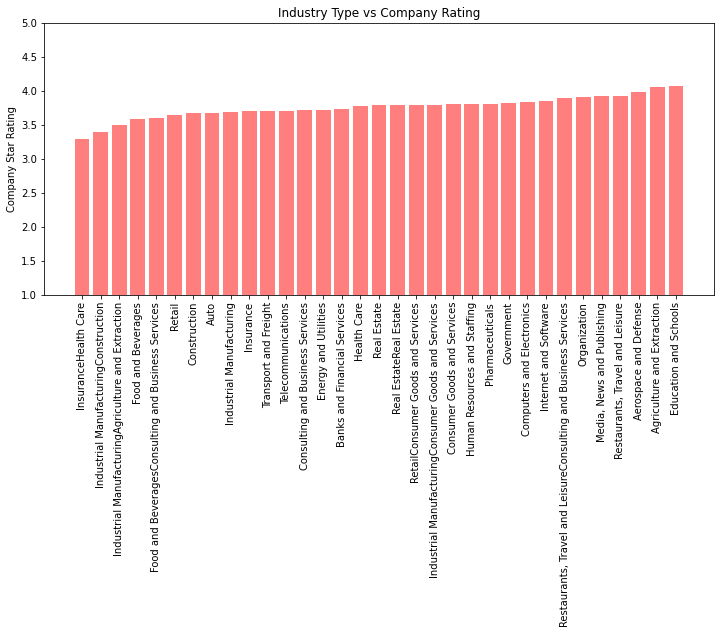

In [61]:
# Industry Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
industry = [value for value in mean_star_by_industry]
x_axis_in = np.arange(len(mean_star_by_industry))# Determine number of bars needed
tick_locations_in = [value for value in x_axis_in] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_in, industry, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations_in, mean_star_by_industry.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.title("Industry Type vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()



# Saving figure
plt.savefig("./Industry vs Company Ratings.png")

In [63]:
# Grouping by Employees
groupby_employee = new_df_indrevemp.groupby('Company_Employees')

# Checking the number of reviews in each group
sum_reviews_by_employee = groupby_employee['No_of_Reviews'].sum()
sum_reviews_by_employee = sum_reviews_by_employee.drop('missing')
sum_reviews_by_employee = sum_reviews_by_employee[['Less than 10,000', '10,000+']]
print(sum_reviews_by_employee)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_employee = groupby_employee['No_of_Stars'].mean()
mean_star_by_employee = mean_star_by_employee.drop('missing')
mean_star_by_employee = mean_star_by_employee[['Less than 10,000', '10,000+']]
mean_star_by_employee = mean_star_by_employee.sort_values(ascending=True)
print(mean_star_by_employee)

Company_Employees
Less than 10,000     102942.0
10,000+             1814555.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Employees
Less than 10,000    3.745070
10,000+             3.835211
Name: No_of_Stars, dtype: float64


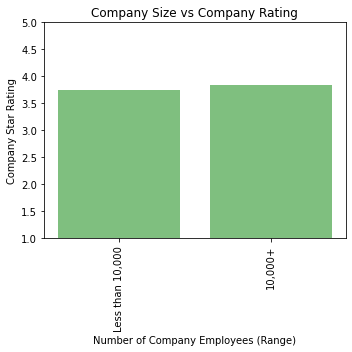

In [64]:
# Employee Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
employee = [value for value in mean_star_by_employee]
x_axis_emp = np.arange(len(mean_star_by_employee))# Determine number of bars needed
tick_loc_emp = [value for value in x_axis_emp] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_emp, employee, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_emp, mean_star_by_employee.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.title("Company Size vs Company Rating")
plt.xlabel("Number of Company Employees (Range)")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Number of Company Employees vs Company Ratings.png")

In [65]:
# Grouping by Revenue
groupby_revenue = new_df_indrevemp.groupby('Company_Revenue')

# Checking the number of reviews in each group
sum_reviews_by_revenue = groupby_revenue['No_of_Reviews'].sum()
sum_reviews_by_revenue =  sum_reviews_by_revenue.drop("Missing")
sum_reviews_by_revenue = sum_reviews_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
print(sum_reviews_by_revenue)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_revenue = groupby_revenue['No_of_Stars'].mean()
mean_star_by_revenue = mean_star_by_revenue.drop("Missing")
mean_star_by_revenue = mean_star_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
mean_star_by_revenue = mean_star_by_revenue.sort_values(ascending=True)
print(mean_star_by_revenue)

Company_Revenue
Less than $1B (USD)       33699.0
$1B to $5B (USD)          90844.0
$5B to $10B (USD)        189015.0
More than $10B (USD)    1260041.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Revenue
Less than $1B (USD)     3.729545
$5B to $10B (USD)       3.775309
$1B to $5B (USD)        3.775781
More than $10B (USD)    3.877941
Name: No_of_Stars, dtype: float64


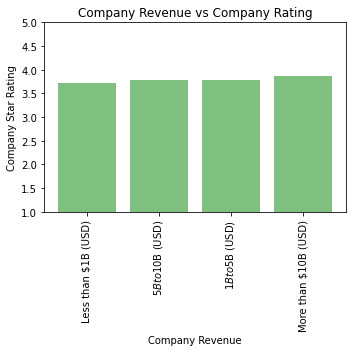

In [66]:
# Revenue Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
revenue = [value for value in mean_star_by_revenue]
x_axis_rev = np.arange(len(mean_star_by_revenue))# Determine number of bars needed
tick_loc_rev = [value for value in x_axis_rev] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_rev, revenue, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_rev, mean_star_by_revenue.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.title("Company Revenue vs Company Rating")
plt.xlabel("Company Revenue")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Company Revenue vs Company Ratings.png")